In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Загрузка данных и первичный осмотр

In [2]:
file = "S02-hw-dataset.csv"
data  = pd.read_csv(file, sep=',')
data

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


Работа с head и первые 10 строк датасета (head())

In [3]:
data.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [4]:
data.head(10)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


Информация о столбцах и типах info()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


Базовые описательные статистики describe()

In [6]:
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [7]:
data.describe(include='all')

,user_id,age,country,purchases,revenue
count,41.000000,39.000000,41,41.000000,41.000000
unique,NaN,NaN,5,NaN,NaN
top,NaN,NaN,RU,NaN,NaN
freq,NaN,NaN,13,NaN,NaN
mean,20.243902,36.512821,NaN,4.829268,820.048780
std,11.659289,18.304259,NaN,2.710189,613.127269
min,1.000000,5.000000,NaN,-1.000000,0.000000
25%,10.000000,24.000000,NaN,3.000000,432.000000
50%,20.000000,33.000000,NaN,5.000000,693.000000
75%,30.000000,45.500000,NaN,7.000000,1115.000000


Пропуски, дубликаты и базовый контроль качества

Пропуски

In [8]:
data_missing = data.isna().mean()
data_missing

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

Дубликаты

In [9]:
data_duplicate = data.duplicated()
data_duplicate

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

Базовый контроль качества

In [10]:
columns = data.columns
columns

Index(['user_id', 'age', 'country', 'purchases', 'revenue'], dtype='object')

In [11]:
group = data.groupby(['user_id','revenue'])
group.size()

user_id  revenue
1        749        1
2        1115       1
3        399        1
4        654        1
5        1296       1
6        785        1
7        0          1
8        456        1
9        980        1
10       511        2
11       0          1
12       1652       1
13       630        1
14       2358       1
15       693        1
16       183        1
17       1608       1
18       0          1
19       432        1
20       442        1
21       1488       1
22       546        1
23       904        1
24       2475       1
25       650        1
26       330        1
27       1302       1
28       828        1
29       1440       1
30       702        1
31       142        1
32       1080       1
33       445        1
34       0          1
35       404        1
36       342        1
37       1104       1
38       738        1
39       1162       1
40       2086       1
dtype: int64

In [12]:
Age = data['age'] < 141
np.where(Age == False)

(array([ 4, 12]),)

In [13]:
group.count()

,,age,country,purchases
user_id,revenue,,,
1,749,1,1,1
2,1115,1,1,1
3,399,1,1,1
4,654,1,1,1
5,1296,0,1,1
6,785,1,1,1
7,0,1,1,1
8,456,1,1,1
9,980,1,1,1


In [14]:
group['age'].median()

user_id  revenue
1        749         25.0
2        1115        24.0
3        399         52.0
4        654         31.0
5        1296         NaN
6        785        120.0
7        0           46.0
8        456         28.0
9        980         39.0
10       511         24.0
11       0           24.0
12       1652        20.0
13       630          NaN
14       2358        36.0
15       693         57.0
16       183         22.0
17       1608        32.0
18       0           24.0
19       432         47.0
20       442         31.0
21       1488         5.0
22       546         33.0
23       904         42.0
24       2475        32.0
25       650         21.0
26       330         35.0
27       1302        54.0
28       828         43.0
29       1440        47.0
30       702         52.0
31       142         55.0
32       1080        26.0
33       445         23.0
34       0           28.0
35       404         45.0
36       342         51.0
37       1104        18.0
38       738         

In [15]:
group.user_id.unique()

user_id  revenue
1        749         [1]
2        1115        [2]
3        399         [3]
4        654         [4]
5        1296        [5]
6        785         [6]
7        0           [7]
8        456         [8]
9        980         [9]
10       511        [10]
11       0          [11]
12       1652       [12]
13       630        [13]
14       2358       [14]
15       693        [15]
16       183        [16]
17       1608       [17]
18       0          [18]
19       432        [19]
20       442        [20]
21       1488       [21]
22       546        [22]
23       904        [23]
24       2475       [24]
25       650        [25]
26       330        [26]
27       1302       [27]
28       828        [28]
29       1440       [29]
30       702        [30]
31       142        [31]
32       1080       [32]
33       445        [33]
34       0          [34]
35       404        [35]
36       342        [36]
37       1104       [37]
38       738        [38]
39       1162       [39]
40      

При контроле данных было выявлено что 4 и 12 индекс в колонке не соответствует максимальному возрасту человека т.к. значение отсутствует
А так же нулевой доход у 4 пользователей

Базовый EDA: группировки, агрегаты и частоты

Посчитать частоты для одной или двух категориальных переменных (например, value_counts() для столбца с категорией/страной/классом)

In [16]:
data.value_counts('country')

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

Выполнить хотя бы одну осмысленную группировку с агрегатами через groupby:
например, среднее и сумму по количественным признакам в разрезе категорий.

In [17]:
group['revenue'].mean()

user_id  revenue
1        749         749.0
2        1115       1115.0
3        399         399.0
4        654         654.0
5        1296       1296.0
6        785         785.0
7        0             0.0
8        456         456.0
9        980         980.0
10       511         511.0
11       0             0.0
12       1652       1652.0
13       630         630.0
14       2358       2358.0
15       693         693.0
16       183         183.0
17       1608       1608.0
18       0             0.0
19       432         432.0
20       442         442.0
21       1488       1488.0
22       546         546.0
23       904         904.0
24       2475       2475.0
25       650         650.0
26       330         330.0
27       1302       1302.0
28       828         828.0
29       1440       1440.0
30       702         702.0
31       142         142.0
32       1080       1080.0
33       445         445.0
34       0             0.0
35       404         404.0
36       342         342.0
37       11

При необходимости ввести дополнительные «коридоры» (bins) или группировки (например, возрастные группы, диапазоны значений и т.п.).

In [18]:
Age = pd.cut(data['age'], 5, labels=['Поколение A', 'Поколение B', 'Поколесение C', 'Поколесение D', 'Поколесение E'])
Age

0       Поколение A
1       Поколение A
2     Поколесение C
3       Поколение B
4               NaN
5     Поколесение E
6       Поколение B
7       Поколение A
8       Поколение B
9       Поколение A
10      Поколение A
11      Поколение A
12              NaN
13      Поколение B
14    Поколесение C
15      Поколение A
16      Поколение B
17      Поколение A
18      Поколение B
19      Поколение B
20      Поколение A
21      Поколение B
22      Поколение B
23      Поколение B
24      Поколение A
25      Поколение B
26    Поколесение C
27      Поколение B
28      Поколение B
29    Поколесение C
30    Поколесение C
31      Поколение A
32      Поколение A
33      Поколение A
34      Поколение B
35      Поколение B
36      Поколение A
37      Поколение B
38      Поколение B
39      Поколение B
40      Поколение A
Name: age, dtype: category
Categories (5, object): ['Поколение A' < 'Поколение B' < 'Поколесение C' < 'Поколесение D' < 'Поколесение E']

По представленным данным доминируют пользователи из России (RU) и Франции (FR), которые составляют большинство в выборке.
Также выделяется почти полное отсутствие представителей категорий "Поколение D" и "Поколение E" в возрастном распределении

Визуализация данных в Matplotlib


Создадим простой DataFrame

In [19]:
np.random.seed(123456)

df = pd.DataFrame({
    'income': np.random.lognormal(mean=3, sigma=0.5, size=500),
    'age': np.random.randint(20, 80, size=500),
    'price': np.random.lognormal(mean=4, sigma=0.6, size=500) + 0.3 * np.random.lognormal(mean=3, sigma=0.5, size=500),
    'category': np.random.choice(['A', 'B', 'C'], size=500)
})

Гистограмма для количественного признака

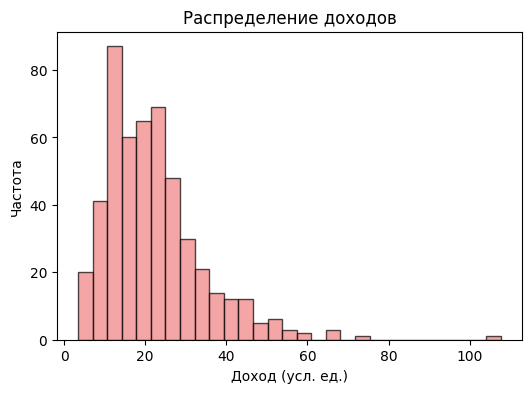

In [20]:

plt.figure(figsize=(6, 4))
plt.hist(df['income'], bins='auto', color='lightcoral', edgecolor='black', alpha=0.7)

plt.title('Распределение доходов')
plt.xlabel('Доход (усл. ед.)')
plt.ylabel('Частота')

plt.savefig('./figures/histogram_income.png', dpi=150, bbox_inches='tight')
plt.show()

Распределение смещено вправо - большинство людей имеют умеренный доход 20–40
но есть «хвост» с высокими значениями >80 Это типично для экономических данных

Один боксплот (boxplot) для количественного признака

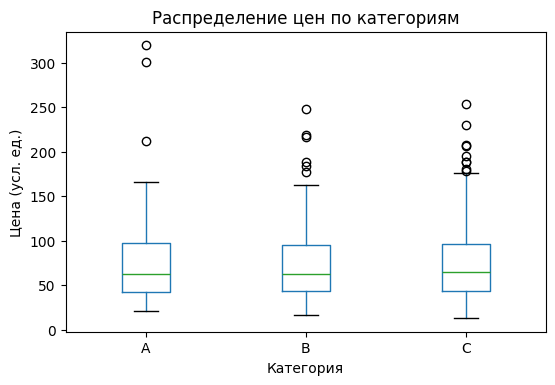

In [21]:
plt.figure(figsize=(6, 4))
df.boxplot(column='price', by='category', ax=plt.gca(), grid=False)

plt.suptitle('')
plt.title('Распределение цен по категориям')
plt.ylabel('Цена (усл. ед.)')
plt.xlabel('Категория')

plt.savefig('./figures/boxplot_by_category.png', dpi=150, bbox_inches='tight')
plt.show()


Во всех категориях медиана схожа, но в категории B наблюдается больше выбросов и больший разброс, что может говорить о неоднородности этой группы


Один scatter plot (диаграмма рассеяния) для пары количественных признаков:

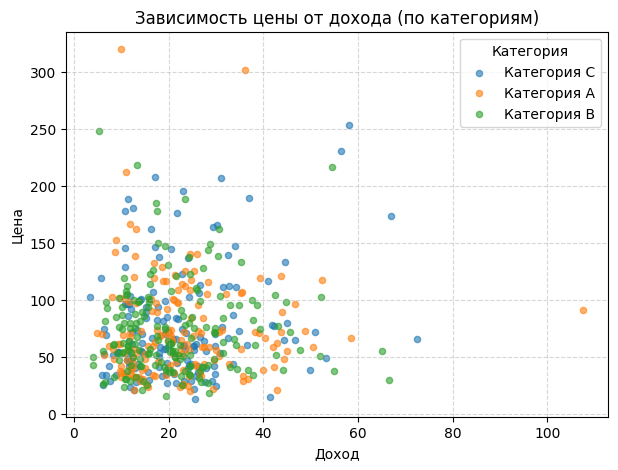

In [22]:
plt.figure(figsize=(7, 5))

categories = df['category'].unique()
colors = ['tab:blue', 'tab:orange', 'tab:green']

for cat, color in zip(categories, colors):
    subset = df[df['category'] == cat]
    plt.scatter(subset['income'], subset['price'], 
                label=f'Категория {cat}', 
                color=color, 
                alpha=0.6, 
                s=20)

plt.title('Зависимость цены от дохода (по категориям)')
plt.xlabel('Доход')
plt.ylabel('Цена')
plt.legend(title='Категория')
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('./figures/scatter.png', dpi=150, bbox_inches='tight')
plt.show()

Наблюдается слабая положительная связь: чем выше доход — тем выше цена.
Категории неплохо разделяются по диапазону: C - чаще ниже по цене, B - выше.